In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import preprocessing
import tensorflow as tf

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWa

In [3]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [4]:
dataset = dataset.iloc[:500,:]
dataset.head(20)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [5]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format = "%Y-%m-%d %H:%M")

In [6]:
dataset = dataset.set_index('timestamp')

In [7]:
dataset.head(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3
2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3
2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3


In [8]:
from matplotlib import pyplot

In [9]:
values = dataset.values

In [10]:
groups = [0,1,2,3,4,5]
i =1

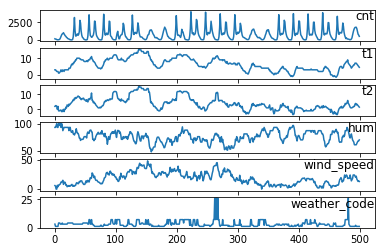

In [11]:
#plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups),1,i)
    pyplot.plot(values[:,group])
    pyplot.title(dataset.columns[group],y=0.5,loc="right")
    i = i +1
pyplot.show()

In [12]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
# load dataset
data = pd.read_csv('C:/Users/lenovo/python_code/london_merged2.csv', header=0, index_col=0)
data.head(20)

,cnt,t1(T-1),t2(T-1),hum(T-1),wind_speed(T-1),weather_code(T-1),is_holiday(T-1),is_weekend(T-1),season(T-1)
timestamp,,,,,,,,,
2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3


In [14]:
values = data.values
values

array([[182. ,   3. ,   2. , ...,   0. ,   1. ,   3. ],
       [138. ,   3. ,   2.5, ...,   0. ,   1. ,   3. ],
       [134. ,   2.5,   2.5, ...,   0. ,   1. ,   3. ],
       ...,
       [337. ,   5.5,   1.5, ...,   0. ,   0. ,   3. ],
       [224. ,   5.5,   1.5, ...,   0. ,   0. ,   3. ],
       [139. ,   5. ,   1. , ...,   0. ,   0. ,   3. ]])

In [15]:
values = values.astype('float32')

In [16]:
x = values[:,1:]
x

array([[ 3. ,  2. , 93. , ...,  0. ,  1. ,  3. ],
       [ 3. ,  2.5, 93. , ...,  0. ,  1. ,  3. ],
       [ 2.5,  2.5, 96.5, ...,  0. ,  1. ,  3. ],
       ...,
       [ 5.5,  1.5, 78.5, ...,  0. ,  0. ,  3. ],
       [ 5.5,  1.5, 76. , ...,  0. ,  0. ,  3. ],
       [ 5. ,  1. , 76. , ...,  0. ,  0. ,  3. ]], dtype=float32)

In [17]:
y = values[:,0]
y

array([182., 138., 134., ..., 337., 224., 139.], dtype=float32)

In [18]:
#normalize features
ss_x = preprocessing.StandardScaler()
train_x = ss_x.fit_transform(x)

In [19]:
ss_y = preprocessing.StandardScaler()
train_y = ss_y.fit_transform(y.reshape(-1,1))

In [20]:
BATCH_START = 0
TIME_STEPS = 10
BATCH_SIZE = 30
INPUT_SIZE = 8
OUTPUT_SIZE = 1
CELL_SIZE = 10
LR = 0.006

In [21]:
def get_batch_bikes():
    global train_x,train_y,BATCH_START,TIME_STEPS
    x_part1 = train_x[BATCH_START:BATCH_START + TIME_STEPS*BATCH_SIZE]
    y_part1 = train_y[BATCH_START:BATCH_START + TIME_STEPS*BATCH_SIZE]
    print("time period =",BATCH_START,BATCH_START + TIME_STEPS*BATCH_SIZE)
    
    seq = x_part1.reshape((BATCH_SIZE,TIME_STEPS,INPUT_SIZE))
    res = y_part1.reshape((BATCH_SIZE,TIME_STEPS,1))
    
    BATCH_START += TIME_STEPS
    return [seq,res]

In [22]:
def get_batch():
    global BATCH_START,TIME_STEPS
    xs = np.arange(BATCH_START,BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE,TIME_STEPS))/(10*np.pi)
    print('xs.shape=',xs.shape)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    import matplotlib.pyplot as plt
    plt.plot(xs[0,:],res[0,:],'r',xs[0,:],seq[0,:],'b--')
    plt.show()
    print('previous:',seq.shape)
    print(seq[:2])
    print('after add a dimension',seq[:,:,np.newaxis].shape)
    print(seq[:2])
    return[seq[:,:,np.newaxis],res[:,:,np.newaxis],xs]

In [23]:
class LSTMRNN(object):
    def __init__(self, n_steps, input_size, output_size, cell_size, batch_size):
        self.n_steps = n_steps
        self.input_size = input_size
        self.output_size = output_size
        self.cell_size = cell_size
        self.batch_size = batch_size
        with tf.name_scope('inputs'):
            self.xs = tf.placeholder(tf.float32, [None, n_steps, input_size], name='xs') #xs 有三个维度
            self.ys = tf.placeholder(tf.float32, [None, n_steps, output_size], name='ys') #ys 有三个维度
        with tf.variable_scope('in_hidden'):
            self.add_input_layer()
        with tf.variable_scope('LSTM_cell'):
            self.add_cell()
        with tf.variable_scope('out_hidden'):
            self.add_output_layer()
        with tf.name_scope('cost'):
            self.compute_cost()
        with tf.name_scope('train'):
            self.train_op = tf.train.AdamOptimizer(LR).minimize(self.cost)
    #增加一个输入层
    def add_input_layer(self,):
        # l_in_x:(batch*n_step, in_size),相当于把这个批次的样本串到一个长度1000的时间线上，每批次50个样本，每个样本20个时刻
        l_in_x = tf.reshape(self.xs, [-1, self.input_size], name='2_2D')  #-1 表示任意行数
        # Ws (in_size, cell_size)
        Ws_in = self._weight_variable([self.input_size, self.cell_size])
        # bs (cell_size, )
        bs_in = self._bias_variable([self.cell_size,])
        # l_in_y = (batch * n_steps, cell_size)
        with tf.name_scope('Wx_plus_b'):
            l_in_y = tf.matmul(l_in_x, Ws_in) + bs_in
        # reshape l_in_y ==> (batch, n_steps, cell_size)
        self.l_in_y = tf.reshape(l_in_y, [-1, self.n_steps, self.cell_size], name='2_3D')
 
    #多时刻的状态叠加层
    def add_cell(self):
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(self.cell_size, forget_bias=1.0, state_is_tuple=True)
        with tf.name_scope('initial_state'):
            self.cell_init_state = lstm_cell.zero_state(self.batch_size, dtype=tf.float32)
        #time_major=False 表示时间主线不是第一列batch
        self.cell_outputs, self.cell_final_state = tf.nn.dynamic_rnn(
            lstm_cell, self.l_in_y, initial_state=self.cell_init_state, time_major=False)
 
    # 增加一个输出层
    def add_output_layer(self):
        # shape = (batch * steps, cell_size)
        l_out_x = tf.reshape(self.cell_outputs, [-1, self.cell_size], name='2_2D')
        Ws_out = self._weight_variable([self.cell_size, self.output_size])
        bs_out = self._bias_variable([self.output_size, ])
        # shape = (batch * steps, output_size)
        with tf.name_scope('Wx_plus_b'):
            self.pred = tf.matmul(l_out_x, Ws_out) + bs_out #预测结果
 
    def compute_cost(self):
        losses = tf.contrib.legacy_seq2seq.sequence_loss_by_example(
            [tf.reshape(self.pred, [-1], name='reshape_pred')],
            [tf.reshape(self.ys, [-1], name='reshape_target')],
            [tf.ones([self.batch_size * self.n_steps], dtype=tf.float32)],
            average_across_timesteps=True,
            softmax_loss_function=self.ms_error,
            name='losses'
        )
        with tf.name_scope('average_cost'):
            self.cost = tf.div(
                tf.reduce_sum(losses, name='losses_sum'),
                self.batch_size,
                name='average_cost')
            tf.summary.scalar('cost', self.cost)
 
    def ms_error(self, y_pre, y_target):
        return tf.square(tf.subtract(y_pre, y_target))
 
    def _weight_variable(self, shape, name='weights'):
        initializer = tf.random_normal_initializer(mean=0., stddev=1.,)
        return tf.get_variable(shape=shape, initializer=initializer, name=name)
 
    def _bias_variable(self, shape, name='biases'):
        initializer = tf.constant_initializer(0.1)
        return tf.get_variable(name=name, shape=shape, initializer=initializer)

In [24]:
seq,res = get_batch_bikes()

time period = 0 300


In [25]:
model = LSTMRNN(TIME_STEPS, INPUT_SIZE, OUTPUT_SIZE, CELL_SIZE, BATCH_SIZE)

In [26]:
sess = tf.Session()

In [27]:
merged = tf.summary.merge_all()

In [28]:
writer = tf.summary.FileWriter("E:\logs",sess.graph)

In [29]:
sess.run(tf.global_variables_initializer())

In [30]:
for j in range(200):
    pred_res = None
    for i in range(20):
        seq,res = get_batch_bikes()
        if i==0:
            feed_dict = {
                model.xs:seq,
                model.ys:res,
            }
        else:
            feed_dict = {
                model.xs:seq,
                model.ys:res,
                model.cell_init_state:state
            }
            
        _,cost,state,pred = sess.run(
            [model.train_op,model.cost,model.cell_final_state,model.pred],
            feed_dict = feed_dict)
        pres_res = pred
        
        result = sess.run(merged,feed_dict)
        writer.add_summary(result,i)
    print('{0}cost:'.format(j),round(cost,4))
    BATCH_START = 0 #restart again

time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
time period = 200 500
0cost: 4.8894
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
1cost: 4.8576
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time per

time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
19cost: 2.2777
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
20cost: 2.2626
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time pe

time period = 170 470
time period = 180 480
time period = 190 490
37cost: 1.3741
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
38cost: 1.3389
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
39cost: 1.2759
time period = 0 300
time period

time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
57cost: 0.9245
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
58cost: 0.9033
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
ti

time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
76cost: 0.7624
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
77cost: 0.8015
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
tim

time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
95cost: 0.9049
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
96cost: 0.8226
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time

time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
114cost: 0.6075
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
115cost: 0.7219
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490


time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
133cost: 0.4434
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
134cost: 0.4311
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450


time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
152cost: 0.3649
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
153cost: 0.3611
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
tim

time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
171cost: 0.3422
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
172cost: 0.3467
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time 

190cost: 0.2817
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
191cost: 0.2922
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period = 40 340
time period = 50 350
time period = 60 360
time period = 70 370
time period = 80 380
time period = 90 390
time period = 100 400
time period = 110 410
time period = 120 420
time period = 130 430
time period = 140 440
time period = 150 450
time period = 160 460
time period = 170 470
time period = 180 480
time period = 190 490
192cost: 0.3025
time period = 0 300
time period = 10 310
time period = 20 320
time period = 30 330
time period

In [31]:
train_y = train_y[190:490]
print('TRUE',train_y.flatten().shape)

TRUE (300,)


In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,3))
axes = fig.add_subplot(1,1,1)

In [33]:
line1, = axes.plot(range(100),pred.flatten()[-100:],'b--',label = 'RNN')
line3, = axes.plot(range(100),train_y.flatten()[-100:],'r',label = 'TRUE')

In [34]:
axes.grid()

In [35]:
fig.tight_layout()

In [36]:
plt.legend(handles = [line1,line3])

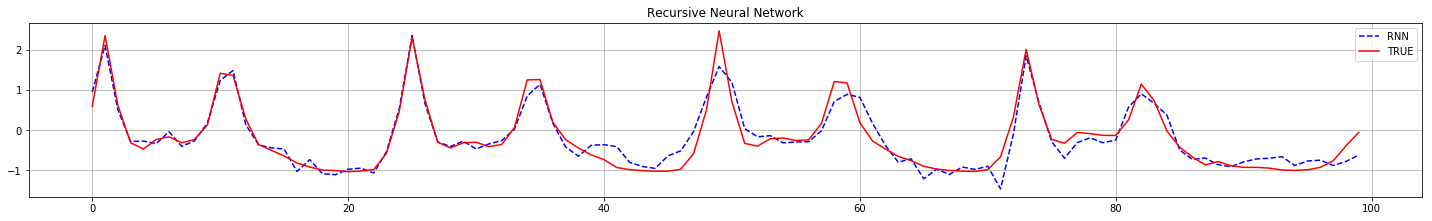

In [37]:
plt.title('Recursive Neural Network')
plt.show()